<a href="https://colab.research.google.com/github/Shashank-agastya/data_analytics/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [2]:
#Load the dataset

In [5]:
df=pd.read_csv(r'/netflix1 (1).csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
df.shape

(8790, 10)

In [9]:
#Data cleaning
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [10]:
df.drop_duplicates(inplace=True)


In [11]:
# Count the number of movies and shows
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


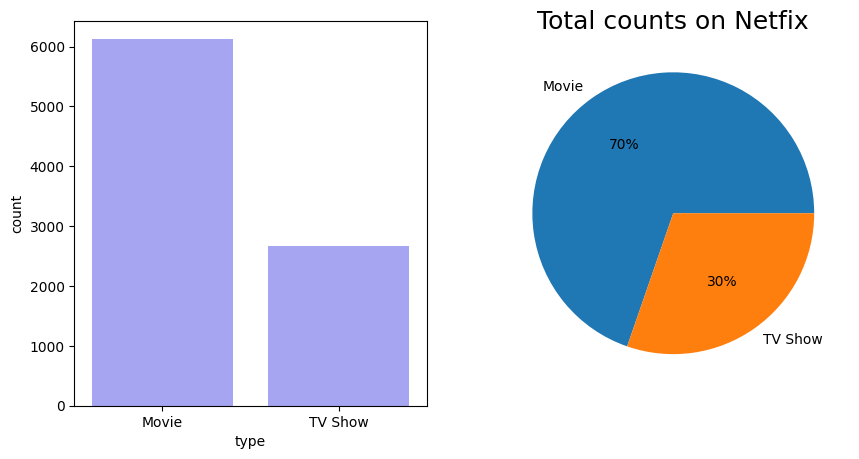

In [12]:
# Plotting the total counts
freq = df['type'].value_counts()
fig,axes =plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'type',data=df,color='blue',alpha =0.4,ax=axes[0])
plt.pie(freq,labels = ['Movie','TV Show'],autopct='%.0f%%')
plt.title('Total counts on Netfix',fontsize=18)
plt.show()

In [13]:
#Classifying the data based on the Rating
df['rating'].value_counts()


,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'UR')])

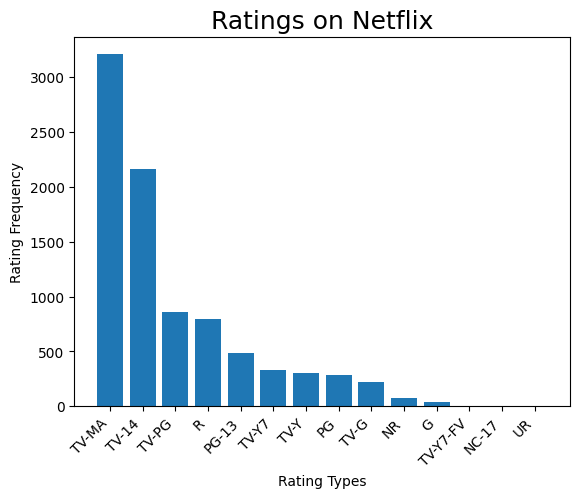

In [14]:
ratings = df['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'],ratings['count'])
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.title('Ratings on Netflix',fontsize=18)
plt.xticks(rotation=45,ha='right')


Text(0.5, 1.0, 'Ratings on Netflix')

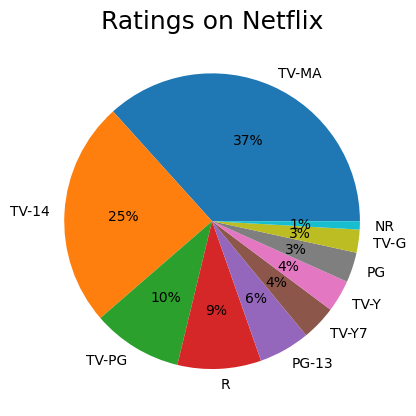

In [15]:
# Plotting the ratings sing pieplot
plt.pie(ratings['count'][:10],labels=ratings['rating'][:10],autopct='%.0f%%')
plt.title('Ratings on Netflix',fontsize=18)


In [16]:
# Converting the date_added column to date_time
df['date_added']=pd.to_datetime(df['date_added'])

In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [18]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


In [19]:
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [20]:
df['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Iran,1
West Germany,1
Greece,1


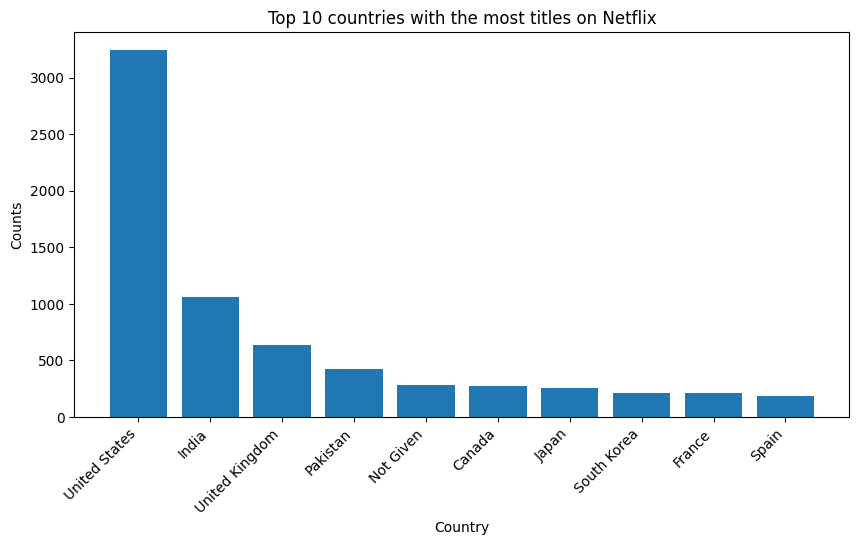

In [21]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(top_ten_countries['country'],top_ten_countries['count'])
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Top 10 countries with the most titles on Netflix')
plt.xticks(rotation=45,ha='right')
plt.show()

In [22]:
#Content added over time


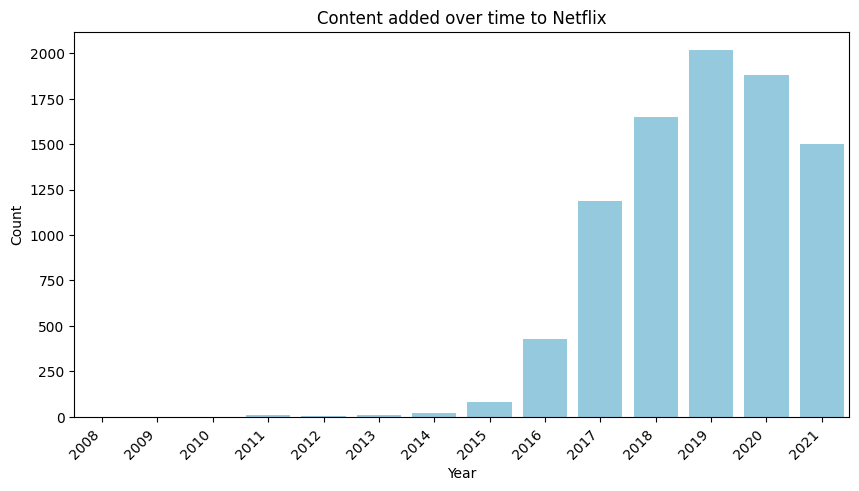

In [23]:
#Content added over months and year
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
plt.figure(figsize=(10,5))
sns.countplot(x='year_added',data=df,color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content added over time to Netflix')
plt.xticks(rotation=45,ha='right')
plt.show()

In [24]:
#Monthly release of Movies and Tv shows

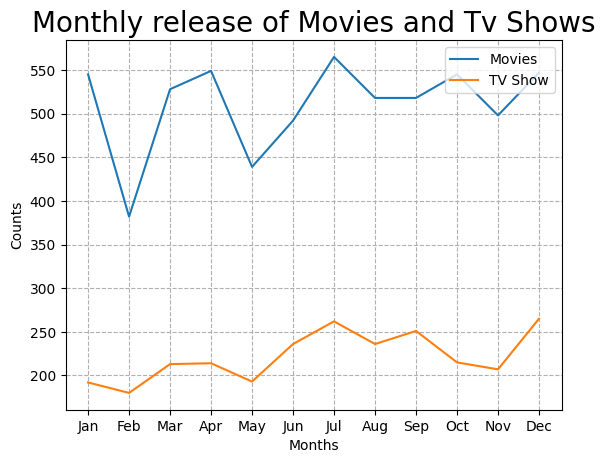

In [25]:
# monthly relsease of movies and tv shows
monthly_movie_release=df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_Series_release=df[df['type']=='TV Show' ]['month_added'].value_counts().sort_index()
plt.plot(monthly_movie_release.index,monthly_movie_release.values,label='Movies')
plt.plot(monthly_Series_release.index,monthly_Series_release.values,label='TV Show')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(loc=1)
plt.grid(linestyle='--')
plt.title('Monthly release of Movies and Tv Shows',fontsize=20)
plt.show()

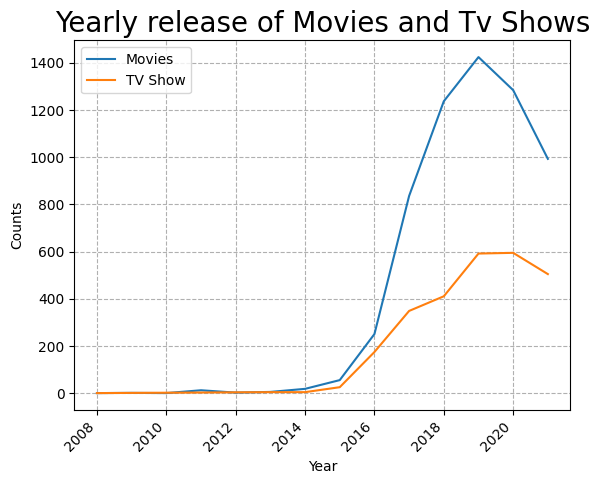

In [26]:
#Yearly release of movies and tv shows on Netflix
yearly_movie_release=df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_Series_release=df[df['type']=='TV Show' ]['year_added'].value_counts().sort_index()
plt.plot(yearly_movie_release.index,yearly_movie_release.values,label='Movies')
plt.plot(yearly_Series_release.index,yearly_Series_release.values,label='TV Show')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=45,ha='right')
plt.legend(loc=2)
plt.grid(linestyle='--')
plt.title('Yearly release of Movies and Tv Shows',fontsize=20)
plt.show()

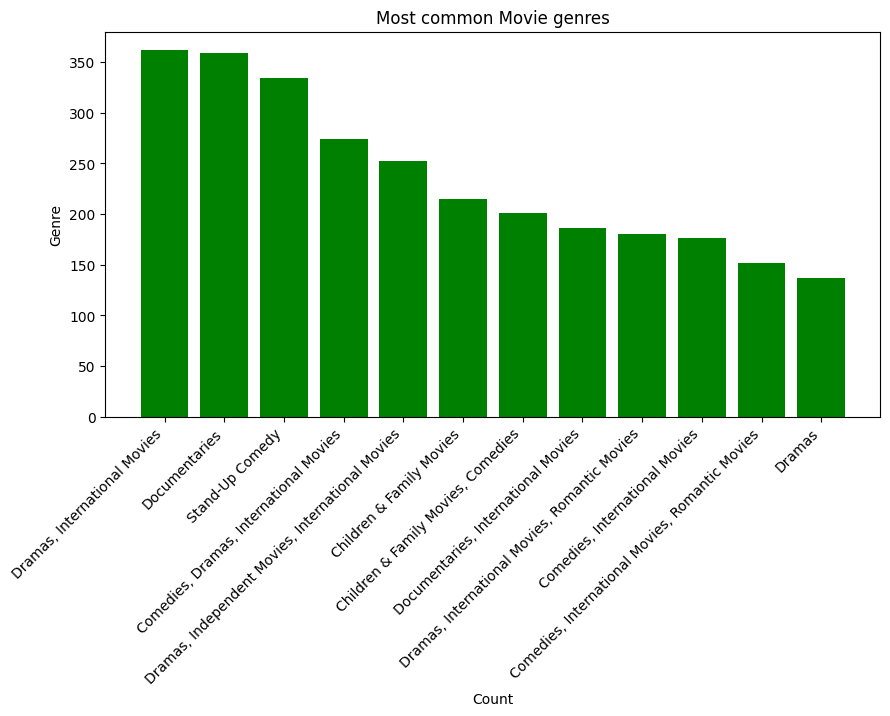

In [27]:
#Most common Movie  genres
popular_movie_genre=df[df['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:12]
plt.figure(figsize=(10,5))
plt.bar(popular_movie_genre.index,popular_movie_genre.values,color='g')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Most common Movie genres')
plt.show()

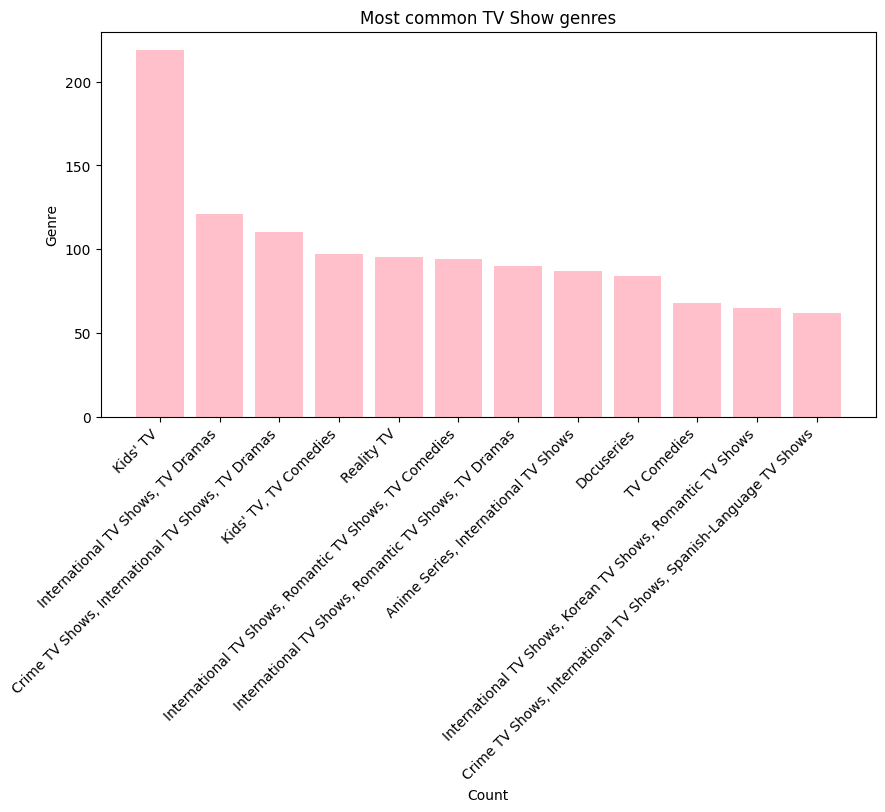

In [28]:
popular_Series_genre=df[df['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:12]
plt.figure(figsize=(10,5))
plt.bar(popular_Series_genre.index,popular_Series_genre.values,color='pink')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Most common TV Show genres')
plt.show()

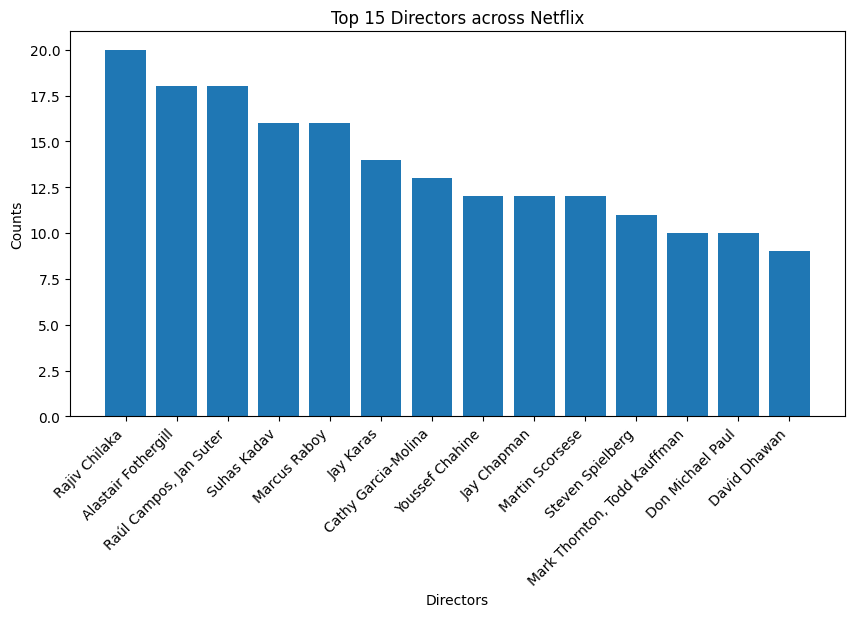

In [29]:
#Top 15 directors across Netflix
top_fifteen_directors=df['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
plt.figure(figsize=(10,5))
plt.bar(top_fifteen_directors['director'],top_fifteen_directors['count'])
plt.xlabel('Directors')
plt.ylabel('Counts')
plt.title('Top 15 Directors across Netflix')
plt.xticks(rotation=45,ha='right')
plt.show()

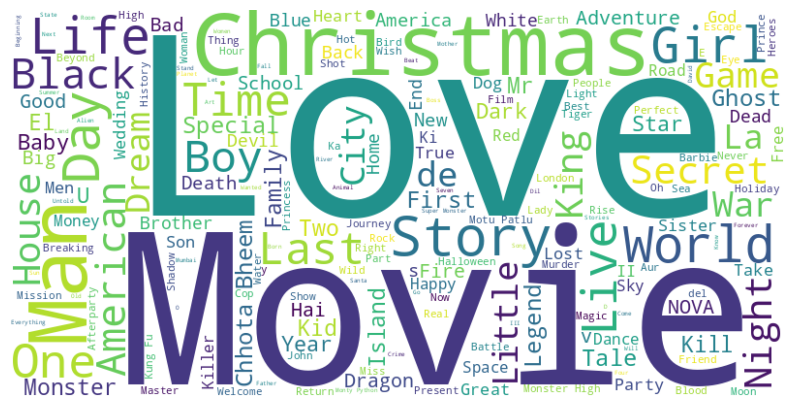

In [31]:
#Word Cloud of Movie titles
movie_titles = df[df['type']=='Movie']['title']
wordcloud = WordCloud(width=800,height=400,background_color ='white').generate( ' '.join(movie_titles))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
#Classifing the data based on the duration of the types
durations = df['duration'].value_counts().reset_index().sort_values(by='count',ascending=False)[:15]

Text(0.5, 1.0, 'Classification based on duration on Netflix')

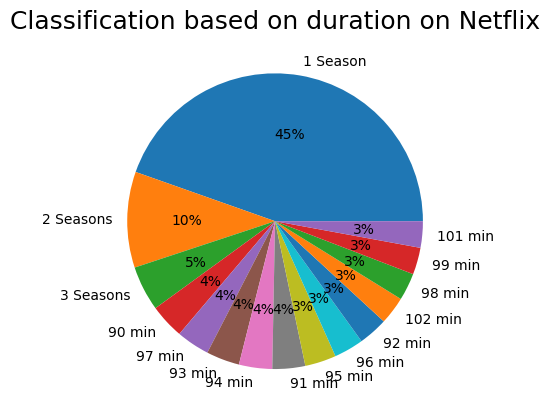

In [33]:
plt.pie(durations['count'][:15],labels=durations['duration'][:15],autopct='%.0f%%')
plt.title('Classification based on duration on Netflix',fontsize=18)

<Figure size 1200x600 with 0 Axes>

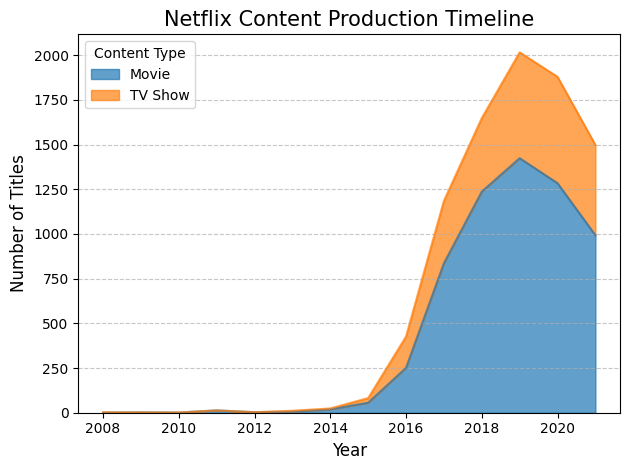

In [37]:
def plot_content_production_timeline(df):
    # Prepare data for stacked area chart
    yearly_content = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

    plt.figure(figsize=(12,6))
    yearly_content.plot(kind='area', stacked=True, alpha=0.7)
    plt.title('Netflix Content Production Timeline', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Titles', fontsize=12)
    plt.legend(title='Content Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_content_production_timeline(df)

<ipython-input-39-806034db288b>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_data = df.groupby(['year_added', 'type']).apply(calculate_genre_diversity).reset_index()


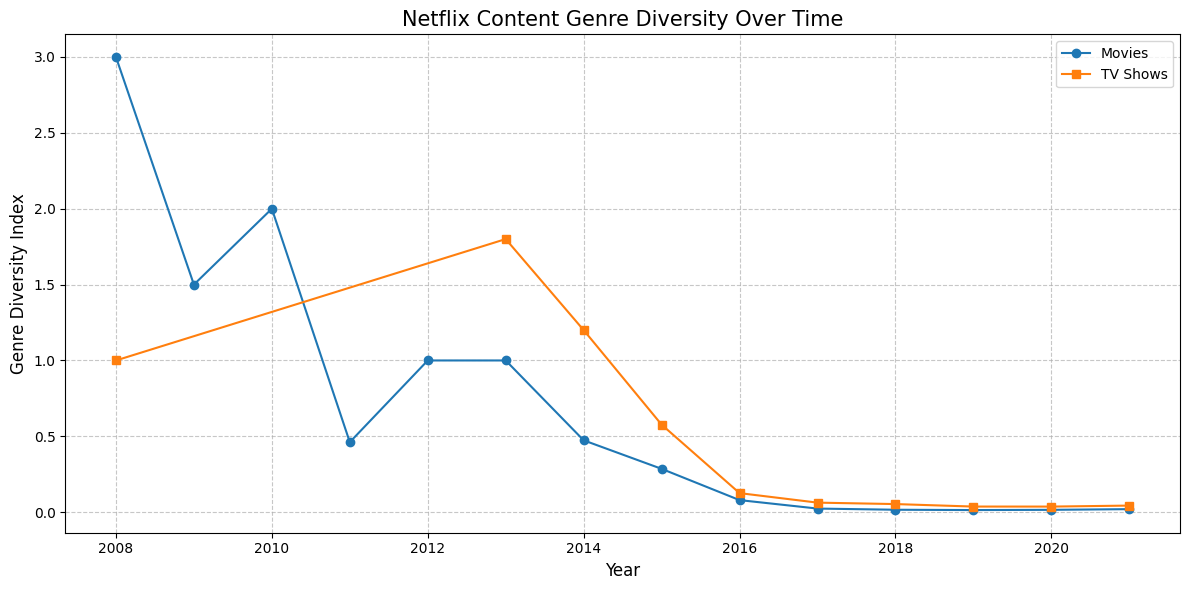

In [39]:
def plot_genre_diversity_index(df):
    # Calculate genre diversity for movies and TV shows
    def calculate_genre_diversity(group):
        genres = group['listed_in'].str.split(', ', expand=True).stack()
        unique_genres = genres.nunique()
        total_titles = len(group)
        diversity_index = unique_genres / total_titles
        return diversity_index

    # Calculate diversity for each year and content type
    diversity_data = df.groupby(['year_added', 'type']).apply(calculate_genre_diversity).reset_index()
    diversity_data.columns = ['Year', 'Type', 'Diversity Index']

    plt.figure(figsize=(12,6))

    # Separate movies and TV shows
    movies_diversity = diversity_data[diversity_data['Type'] == 'Movie']
    shows_diversity = diversity_data[diversity_data['Type'] == 'TV Show']

    plt.plot(movies_diversity['Year'], movies_diversity['Diversity Index'],
             label='Movies', marker='o')
    plt.plot(shows_diversity['Year'], shows_diversity['Diversity Index'],
             label='TV Shows', marker='s')

    plt.title('Netflix Content Genre Diversity Over Time', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Genre Diversity Index', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_genre_diversity_index(df)